## Assignment Machine Learning Prediction

### Objectives

perform exploratory Data Analysis and determine Training Labels

. create a column of the class

. Standardize training data

. Split into training data and test data

-Find best Hyperparameter for SVM, Classification Tress and Logistic Regression

. Find the method performs best using test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.headmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

### Load the dataframe

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(url2)
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Task 1

Create a Numpy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y, make sure the output is a Pandas series (only one bracket df['name of the column]).

In [5]:
# Suponiendo que la columna se llama 'Class'
Y = data['Class'].to_numpy()

# Asegúrate de que Y sea una Pandas Series
Y = pd.Series(Y)

# Imprime Y para verificar el resultado
print(Y)

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Length: 90, dtype: int64


### Task 2

Standardize the data in X then reassingn it to the variable X using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X.astype(float))
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the function train_test_split. The training data is divided into validation data, a second set used for training data; then models are trained and hyperparameters are selected using the function GridSearchCV.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape

(18,)

### Task 4
We fir a logistic regression model by then creating a GridSearchCV object lr_cv with cv = 10.
Then Fit the object to find the best parameters from the given parameters dictionary .



In [8]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lcr = LogisticRegression()

In [9]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv= GridSearchCV(lr,parameters, cv=10)
lr_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
We output the GridSearchCV object for logistic regression. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

In [10]:
print("Tuned hyperparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)
# print(lr_cv.best_params_)
# print(lr_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


### Task 5
We now calculate the accuracy on the test data using the score method:

In [11]:
# lr=LogisticRegression(C=0.1, penalty='l2', solver='lbfgs')
# lr.fit(X_train,Y_train)
lrts= lr_cv.score(X_test,Y_test)
lrts

0.8333333333333334

Plotting the confusion matrix:

In [12]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


TypeError: 'module' object is not callable

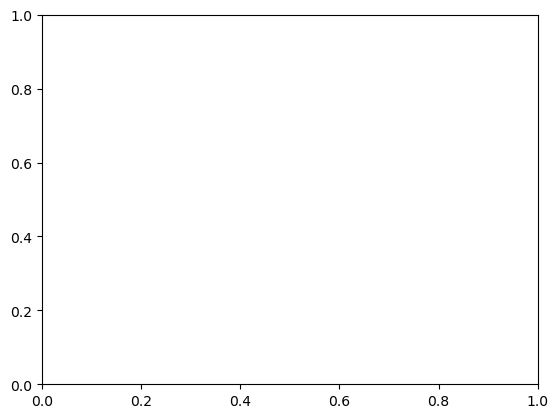

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot import confusion_matrix as plot_confusion_matrix
import matplotlib.pyplot as plt

yhat = lr_cv.predict(X_test)

# Obtener la matriz de confusión
cm = confusion_matrix(Y_test, yhat)

# Crear la figura y los ejes antes de llamar a plot_confusion_matrix
fig, ax = plt.subplots()
plot_confusion_matrix(lr_cv, X_test, Y_test, cmap=plt.cm.Blues, display_labels=None, ax=ax)  # No hay necesidad de asignar a una variable
ax.set_title('Confusion Matrix for Logistic Regression')

# Mostrar la figura
plt.show()

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

### Task 6

Fitting a Support Vector Machine by using GridSearchCV hyperparameter tuning with cv=10.

In [14]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [15]:
svm_cv= GridSearchCV(svm,parameters, cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [16]:
print("Tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


### Task 7
Calculate the accuracy on the test data:

In [17]:
svmts= svm_cv.score(X_test,Y_test)
svmts

0.8333333333333334

Plotting the confusion matrix

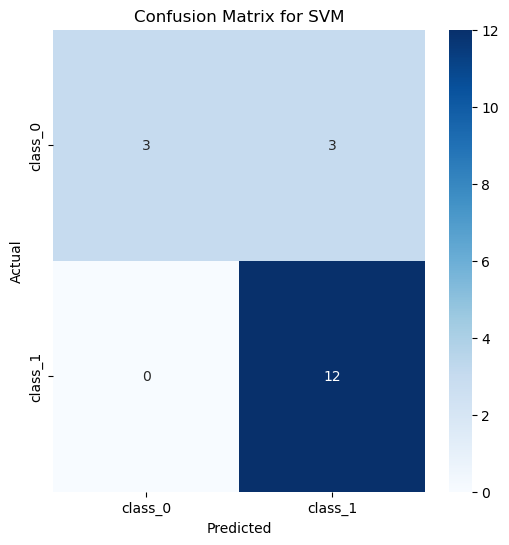

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que svm_cv es tu modelo SVM ya entrenado
# X_test son tus datos de prueba y Y_test son las etiquetas reales

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, svm_cv.predict(X_test))

# Configurar el gráfico
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


### Task 8

Training a decision tree classifier using GridSearchCV hyperparameter tuning with cv = 10.

In [21]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [22]:
tree_cv= GridSearchCV(tree,parameters, cv=10)
tree_cv.fit(X_train,Y_train)

/Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/josethorex/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_co

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("Tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


## Task 9
Calculating the accuracy of tree_cv on the test data:

In [24]:
dtts= tree_cv.score(X_test,Y_test)
dtts

0.8333333333333334

Plotting the confusion matrix:

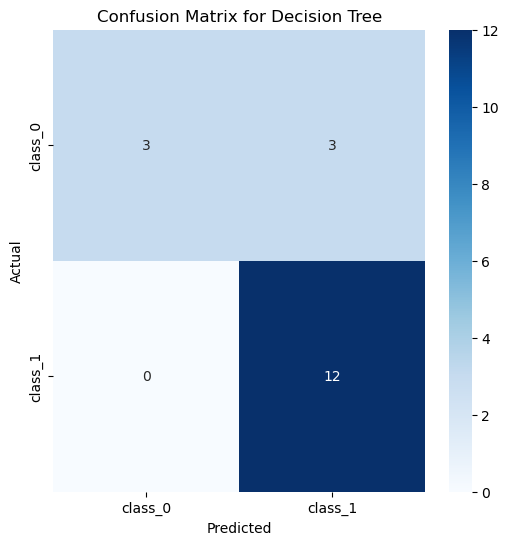

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tree_cv es tu modelo de árbol de decisión ya entrenado
# X_test son tus datos de prueba y Y_test son las etiquetas reales
yhat = tree_cv.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, yhat)

# Configurar el gráfico
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Task 10
Training a KNN classifier and tuning the parameters:

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Supongamos que tienes tus datos en X_train, X_test, Y_train, Y_test

# Definir el clasificador KNN
KNN = KNeighborsClassifier()

# Definir los parámetros que quieres probar
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Crear un objeto GridSearchCV
knn_cv = GridSearchCV(KNN, parameters, cv=5)  # Puedes ajustar el número de pliegues en "cv" según tus necesidades

# Ajustar el modelo a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

# Imprimir los mejores parámetros y la precisión correspondiente
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Accuracy: 0.8609523809523811


In [29]:
nn= knn_cv.best_params_['n_neighbors']

### Task 11
Calculating the accuracy of knn_cv on the test data:

In [30]:
knnts= knn_cv.score(X_test,Y_test)
knnts

0.8333333333333334

Plotting the confusion matrix:

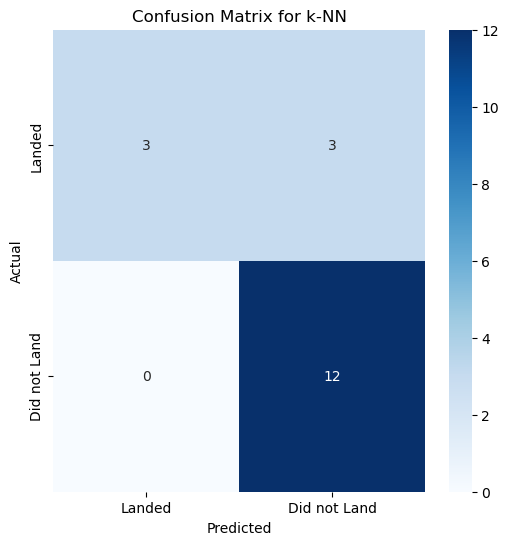

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que knn_cv es tu modelo k-NN ya entrenado
# X_test son tus datos de prueba y Y_test son las etiquetas reales

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, knn_cv.predict(X_test))

# Configurar el gráfico
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Landed', 'Did not Land'], yticklabels=['Landed', 'Did not Land'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for k-NN')
plt.show()


### Task 12
Finding which method performs best:

In [34]:
lrs= lr_cv.best_score_
svms= svm_cv.best_score_
dts= tree_cv.best_score_
knns= knn_cv.best_score_
# acc_sc={'LogisticRegression':lrs,'SVM':svms,'Decision Tree':dts,'KNN':knns}
scdf = pd.DataFrame([[lrs, lrts],[svms, svmts],[dts, dtts],[knns, knnts]], columns=['Accuracy', 'Test Accuracy'], index=[
                    'LogisticRegression', 'SVM', 'DecisionTree', f'{nn}-NN'])
scdf

,Accuracy,Test Accuracy
LogisticRegression,0.846429,0.833333
SVM,0.848214,0.833333
DecisionTree,0.876786,0.833333
8-NN,0.860952,0.833333


Plotting a bar chart for the scores of the models:

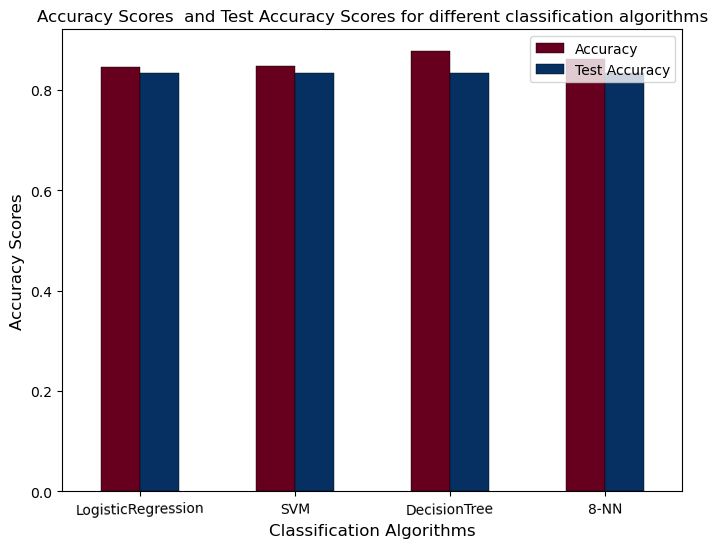

In [35]:
scdf.plot(kind='bar', figsize=(8,6), rot=1, edgecolor='black', linewidth=0.3, cmap='RdBu')
plt.title('Accuracy Scores  and Test Accuracy Scores for different classification algorithms')
plt.xlabel('Classification Algorithms', fontsize=12)
plt.ylabel('Accuracy Scores', fontsize=12)
plt.show()

Finding the best classification model:

In [36]:
mean_acc=(scdf['Accuracy']+scdf['Test Accuracy'])/2
mean_acc= mean_acc.to_frame()
mean_acc.reset_index(inplace=True)
mean_acc.columns = ['Model', 'Mean Accuracy']

best_model= mean_acc[mean_acc['Mean Accuracy']== mean_acc['Mean Accuracy'].max()]['Model']
best_model= best_model.to_string(index=False)
print(f"The best classification model is {best_model}, with a mean accuracy of {mean_acc['Mean Accuracy'].max()}")
print(f"The best parameters for the Decision Tree model are:\n {tree_cv.best_params_}")

The best classification model is  DecisionTree, with a mean accuracy of 0.8550595238095238
The best parameters for the Decision Tree model are:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


## Observations

Based on the analysis of various classification models, it has been determined that the Decision Tree model outperforms others, demonstrating a mean accuracy of approximately 85.51%. The model was fine-tuned with the following hyperparameters: 'criterion' set to 'entropy', 'max_depth' at 8, 'max_features' utilizing 'sqrt', 'min_samples_leaf' set to 4, 'min_samples_split' equal to 2, and 'splitter' employing 'random'.

This indicates that the Decision Tree model, with its specific configuration, provides the highest accuracy in predicting the target variable. The 'entropy' criterion, combined with a limited tree depth, optimized feature selection, and carefully chosen thresholds for node splitting and leaf generation, contributes to the model's robust performance.

These findings underscore the importance of hyperparameter tuning in achieving optimal model performance. The selected configuration not only enhances accuracy but also ensures a balanced trade-off between bias and variance, resulting in a well-generalized model. The success of the Decision Tree model in this context suggests its suitability for the given classification task and emphasizes the significance of thorough model evaluation and parameter optimization in machine learning workflows.